## **Importing Required Libraries**:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

## **Loading Dataset** 📚

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
production=pd.read_csv('gdrive/My Drive/gro_homework/Production Quantity.csv')
ndvi=pd.read_csv('gdrive/My Drive/gro_homework/Eight Day NDVI.csv')
temperature=pd.read_csv('gdrive/My Drive/gro_homework/Daily Temperature.csv')
soil_moisture=pd.read_csv('gdrive/My Drive/gro_homework/Daily Soil Mositure.csv')
precipitation=pd.read_csv('gdrive/My Drive/gro_homework/Daily Precipitation.csv')

## **Understanding and Cleaning Datasets** 🤔

#### Checking for missing values

In [5]:
production.isnull().sum()

start_date    0
end_date      0
prod          0
region_id     0
dtype: int64

In [6]:
ndvi.isnull().sum()

start_date    0
end_date      0
ndvi          0
region_id     0
dtype: int64

In [7]:
temperature.isnull().sum()

start_date    0
end_date      0
temp          0
region_id     0
dtype: int64

In [8]:
soil_moisture.isnull().sum()

start_date    0
end_date      0
smos          0
region_id     0
dtype: int64

In [9]:
precipitation.isnull().sum()

start_date    0
end_date      0
precip        0
region_id     0
dtype: int64

There are no null values in the data.

#### Checking for datatypes

In [10]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   start_date  720 non-null    object
 1   end_date    720 non-null    object
 2   prod        720 non-null    int64 
 3   region_id   720 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 22.6+ KB


In [11]:
ndvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  3338 non-null   object 
 1   end_date    3338 non-null   object 
 2   ndvi        3338 non-null   float64
 3   region_id   3338 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 104.4+ KB


In [12]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12930 entries, 0 to 12929
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  12930 non-null  object 
 1   end_date    12930 non-null  object 
 2   temp        12930 non-null  float64
 3   region_id   12930 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 404.2+ KB


In [13]:
soil_moisture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29603 entries, 0 to 29602
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  29603 non-null  object 
 1   end_date    29603 non-null  object 
 2   smos        29603 non-null  float64
 3   region_id   29603 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 925.2+ KB


In [14]:
precipitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29940 entries, 0 to 29939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  29940 non-null  object 
 1   end_date    29940 non-null  object 
 2   precip      29940 non-null  float64
 3   region_id   29940 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 935.8+ KB


In [15]:
# Changing to approriate datatypes
production['start_date']=pd.to_datetime(production['start_date']).dt.tz_localize(None)
soil_moisture['start_date']=pd.to_datetime(soil_moisture['start_date'])
temperature['start_date']=pd.to_datetime(temperature['start_date'])
precipitation['start_date']=pd.to_datetime(precipitation['start_date'])
ndvi['start_date']=pd.to_datetime(ndvi['start_date'])


production['end_date']=pd.to_datetime(production['end_date'])
soil_moisture['end_date']=pd.to_datetime(soil_moisture['end_date'])
temperature['end_date']=pd.to_datetime(temperature['end_date'])
precipitation['end_date']=pd.to_datetime(precipitation['end_date'])
ndvi['end_date']=pd.to_datetime(ndvi['end_date'])


In [16]:
#verification
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12930 entries, 0 to 12929
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   start_date  12930 non-null  datetime64[ns, UTC]
 1   end_date    12930 non-null  datetime64[ns, UTC]
 2   temp        12930 non-null  float64            
 3   region_id   12930 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(1)
memory usage: 404.2 KB


In [17]:
#can check for outliers ** later 

### Consolidating daily data to monthly data

In [18]:
precipitation['year']=pd.DatetimeIndex(precipitation['start_date']).year
precipitation['month']=pd.DatetimeIndex(precipitation['start_date']).month

In [19]:
temperature['year']=pd.DatetimeIndex(temperature['start_date']).year
temperature['month']=pd.DatetimeIndex(temperature['start_date']).month

In [20]:
soil_moisture['year']=pd.DatetimeIndex(soil_moisture['start_date']).year
soil_moisture['month']=pd.DatetimeIndex(soil_moisture['start_date']).month

In [21]:
ndvi['year']=pd.DatetimeIndex(ndvi['start_date']).year
ndvi['month']=pd.DatetimeIndex(ndvi['start_date']).month

In [22]:
production['year']=pd.DatetimeIndex(production['start_date']).year
production['month']=pd.DatetimeIndex(production['start_date']).month

In [23]:
precipitation_consolidated = precipitation.groupby(['year','month','region_id'])['precip'].mean().reset_index(name='precip')
precipitation_consolidated['start_date']=''
for i in range(len(precipitation_consolidated)):
  precipitation_consolidated['start_date'][i]=pd.date_range('{}-{}'.format(precipitation_consolidated['year'][i], precipitation_consolidated['month'][i]),periods=1,freq='D')[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
precipitation_consolidated.head()

,year,month,region_id,precip,start_date
0,2014,1,93,2.541758,2014-01-01 00:00:00
1,2014,1,94,0.903706,2014-01-01 00:00:00
2,2014,1,95,2.754678,2014-01-01 00:00:00
3,2014,1,97,1.486648,2014-01-01 00:00:00
4,2014,1,98,4.303181,2014-01-01 00:00:00


In [25]:
soil_moisture_consolidated = soil_moisture.groupby(['year','month','region_id'])['smos'].mean().reset_index(name='smos')
soil_moisture_consolidated['start_date']=''
for i in range(len(soil_moisture_consolidated)):
  soil_moisture_consolidated['start_date'][i]=pd.date_range('{}-{}'.format(soil_moisture_consolidated['year'][i], soil_moisture_consolidated['month'][i]),periods=1,freq='D')[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
soil_moisture_consolidated.head()

,year,month,region_id,smos,start_date
0,2014,1,93,0.287870,2014-01-01 00:00:00
1,2014,1,94,0.285901,2014-01-01 00:00:00
2,2014,1,95,0.268944,2014-01-01 00:00:00
3,2014,1,97,0.295487,2014-01-01 00:00:00
4,2014,1,98,0.207876,2014-01-01 00:00:00


In [27]:
temperature_consolidated = temperature.groupby(['year','month','region_id'])['temp'].mean().reset_index(name='temp')
temperature_consolidated['start_date']=''
for i in range(len(temperature_consolidated)):
  temperature_consolidated['start_date'][i]=pd.date_range('{}-{}'.format(temperature_consolidated['year'][i], temperature_consolidated['month'][i]),periods=1,freq='D')[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
temperature_consolidated.head()

,year,month,region_id,temp,start_date
0,2014,1,93,25.482158,2014-01-01 00:00:00
1,2014,1,94,25.857623,2014-01-01 00:00:00
2,2014,1,95,22.430714,2014-01-01 00:00:00
3,2014,1,97,25.554444,2014-01-01 00:00:00
4,2014,1,98,23.789993,2014-01-01 00:00:00


In [29]:
ndvi_consolidated = ndvi.groupby(['year','month','region_id'])['ndvi'].mean().reset_index(name='ndvi')
ndvi_consolidated['start_date']=''
for i in range(len(ndvi_consolidated)):
  ndvi_consolidated['start_date'][i]=pd.date_range('{}-{}'.format(ndvi_consolidated['year'][i], ndvi_consolidated['month'][i]),periods=1,freq='D')[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [30]:
ndvi_consolidated.head()

,year,month,region_id,ndvi,start_date
0,2013,12,93,0.679106,2013-12-01 00:00:00
1,2013,12,94,0.749433,2013-12-01 00:00:00
2,2013,12,97,0.751093,2013-12-01 00:00:00
3,2013,12,99,0.784205,2013-12-01 00:00:00
4,2013,12,102,0.759486,2013-12-01 00:00:00


### Removing unecessary columns

In [31]:
production=production.drop(columns=['year','month'],axis=1)
ndvi_consolidated=ndvi_consolidated.drop(columns=['year', 'month'],axis=1)
temperature_consolidated=temperature_consolidated.drop(columns=['year','month'],axis=1)
soil_moisture_consolidated=soil_moisture_consolidated.drop(columns=['year','month'],axis=1)
precipitation_consolidated=precipitation_consolidated.drop(columns=['year','month'],axis=1)

In [32]:
production=production.drop(columns=['end_date'],axis=1)

In [33]:
ndvi_consolidated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region_id   993 non-null    int64  
 1   ndvi        993 non-null    float64
 2   start_date  993 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.4+ KB


In [34]:
soil_moisture_consolidated['start_date']=pd.to_datetime(soil_moisture_consolidated['start_date'])
temperature_consolidated['start_date']=pd.to_datetime(temperature_consolidated['start_date'])
precipitation_consolidated['start_date']=pd.to_datetime(precipitation_consolidated['start_date'])
ndvi_consolidated['start_date']=pd.to_datetime(ndvi_consolidated['start_date'])

In [35]:
ndvi_consolidated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   region_id   993 non-null    int64         
 1   ndvi        993 non-null    float64       
 2   start_date  993 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.4 KB


### Merging datasets

In [36]:
production['start_date']=pd.to_datetime(production['start_date']).dt.tz_localize(None)

In [37]:
final_merge=pd.merge(production, temperature_consolidated, how='left', on=('start_date','region_id'))

In [38]:
final_merge=pd.merge(final_merge, soil_moisture_consolidated, how='left', on=('start_date','region_id'))

In [39]:
final_merge=pd.merge(final_merge, precipitation_consolidated, how='left', on=('start_date','region_id'))

In [40]:
final_merge=pd.merge(final_merge, ndvi_consolidated, how='left', on=('start_date','region_id'))

In [41]:
final_merge

,start_date,prod,region_id,temp,smos,precip,ndvi
0,2015-01-01,171725,93,25.003593,0.318552,4.394452,0.761228
1,2015-02-01,188325,93,26.807568,0.291452,1.206137,0.758957
2,2015-03-01,247856,93,26.954109,0.251969,3.454652,0.752754
3,2015-04-01,282791,93,26.948865,0.248915,10.466472,0.785057
4,2015-05-01,291057,93,25.405121,0.280602,9.007986,0.805262
...,...,...,...,...,...,...,...
715,2020-08-01,57818,105,27.424585,0.225784,7.635350,0.813444
716,2020-09-01,57474,105,27.940492,0.277477,6.852630,0.810768
717,2020-10-01,51821,105,27.048770,0.277670,11.276676,0.815188
718,2020-11-01,44947,105,24.715070,0.302014,17.676531,0.803192


In [42]:
#re-arranging for better look
final_merge=final_merge[['start_date','region_id','temp','precip','smos','ndvi','prod']]

In [43]:
final_merge.head()

,start_date,region_id,temp,precip,smos,ndvi,prod
0,2015-01-01,93,25.003593,4.394452,0.318552,0.761228,171725
1,2015-02-01,93,26.807568,1.206137,0.291452,0.758957,188325
2,2015-03-01,93,26.954109,3.454652,0.251969,0.752754,247856
3,2015-04-01,93,26.948865,10.466472,0.248915,0.785057,282791
4,2015-05-01,93,25.405121,9.007986,0.280602,0.805262,291057


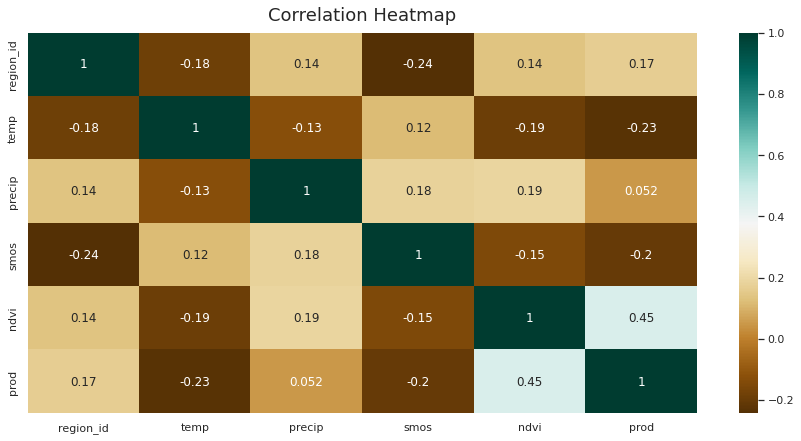

In [71]:
sns.heatmap(final_merge.corr(),cmap='BrBG',annot=True).set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

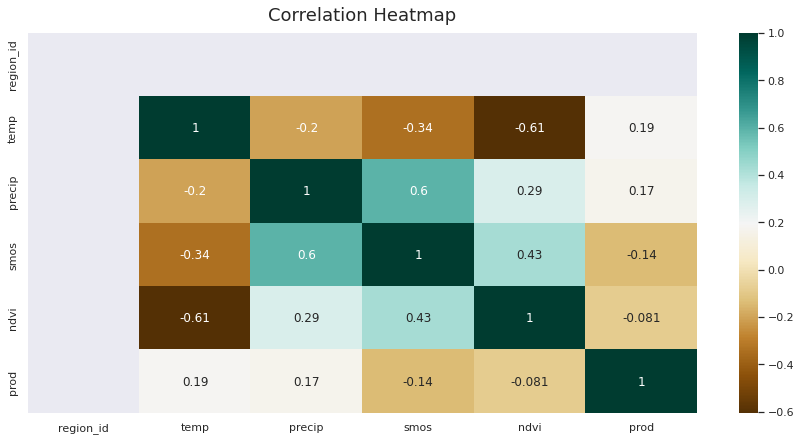

In [72]:
sns.heatmap(final_merge[final_merge['region_id']==94].corr(),cmap='BrBG',annot=True).set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

## **Data Analysis**

1. Analysis on production data
2. Analysis on production vs other variables
3. find ACF and PACF plots 

In [44]:
# Analysis on production data
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(9,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

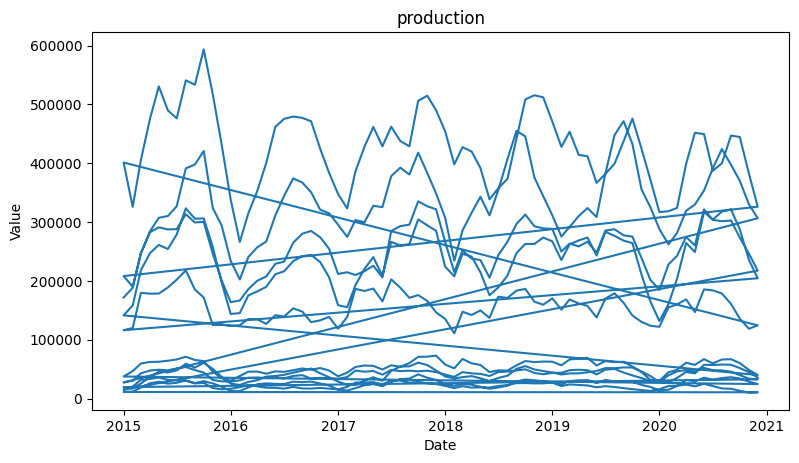

In [45]:
plot_df(production, x=production['start_date'], y=production['prod'], title='production')

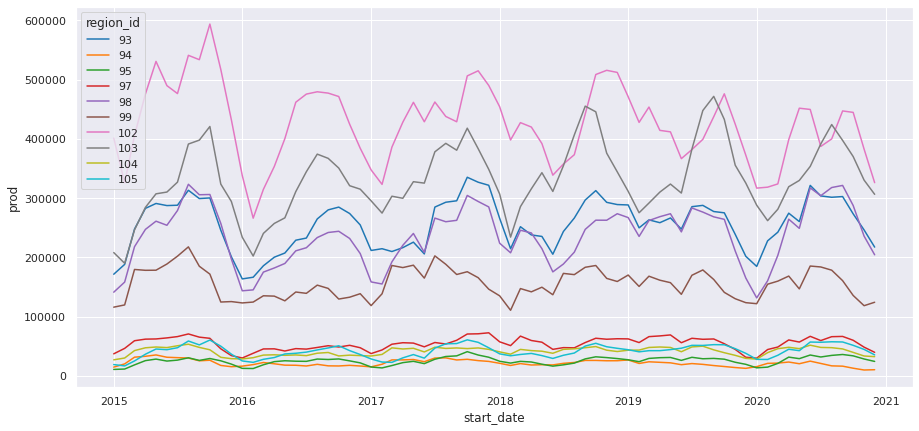

In [46]:
sns.set(rc = {'figure.figsize':(15,7)})
sns.lineplot(data=production, 
             x='start_date', 
             y='prod', 
             hue='region_id', 
             legend='full',palette="tab10")

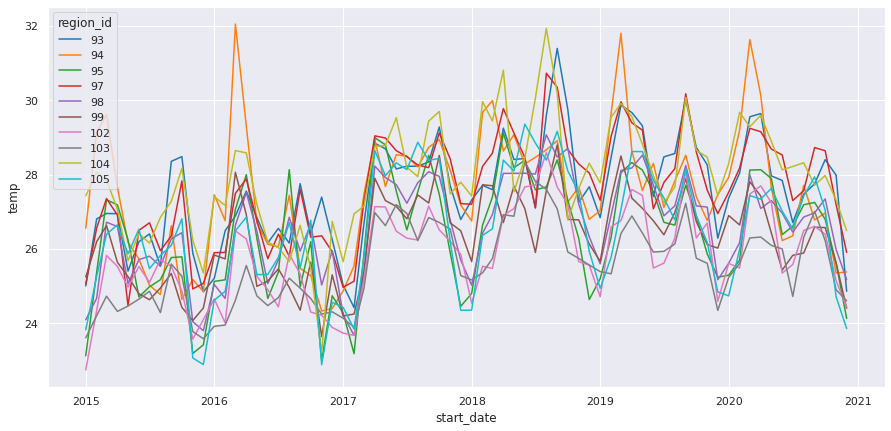

In [47]:
sns.set(rc = {'figure.figsize':(15,7)})
sns.lineplot(data=final_merge, 
             x='start_date', 
             y='temp', 
             hue='region_id', 
             legend='full',palette="tab10")

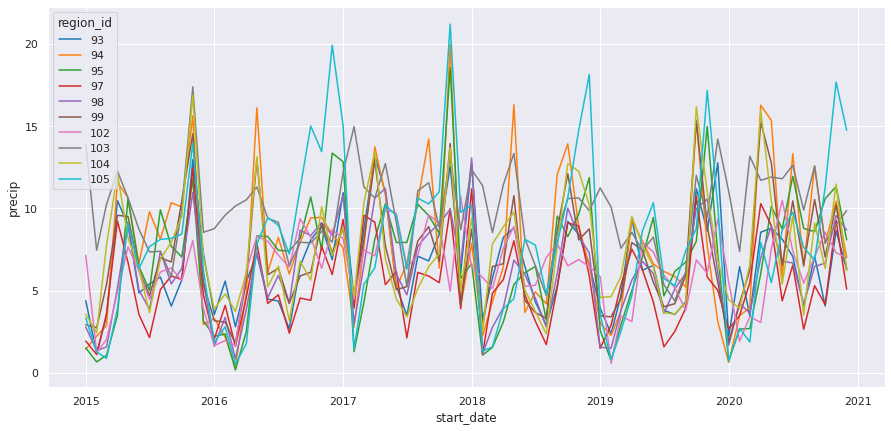

In [48]:
sns.set(rc = {'figure.figsize':(15,7)})
sns.lineplot(data=final_merge, 
             x='start_date', 
             y='precip', 
             hue='region_id', 
             legend='full',palette="tab10")

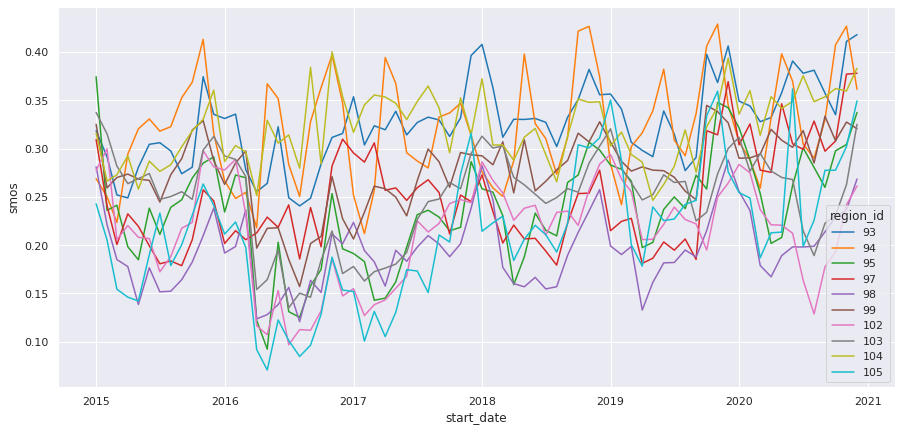

In [49]:
sns.set(rc = {'figure.figsize':(15,7)})
sns.lineplot(data=final_merge, 
             x='start_date', 
             y='smos', 
             hue='region_id', 
             legend='full',palette="tab10")

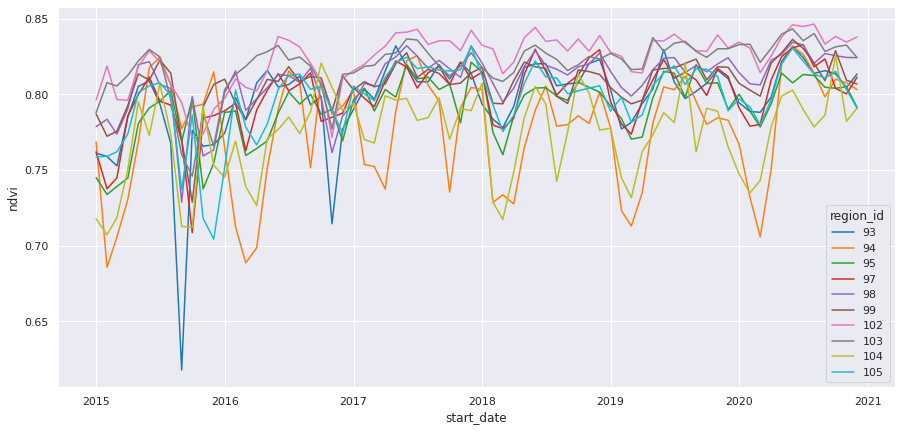

In [50]:
sns.set(rc = {'figure.figsize':(15,7)})
sns.lineplot(data=final_merge, 
             x='start_date', 
             y='ndvi', 
             hue='region_id', 
             legend='full',palette="tab10")

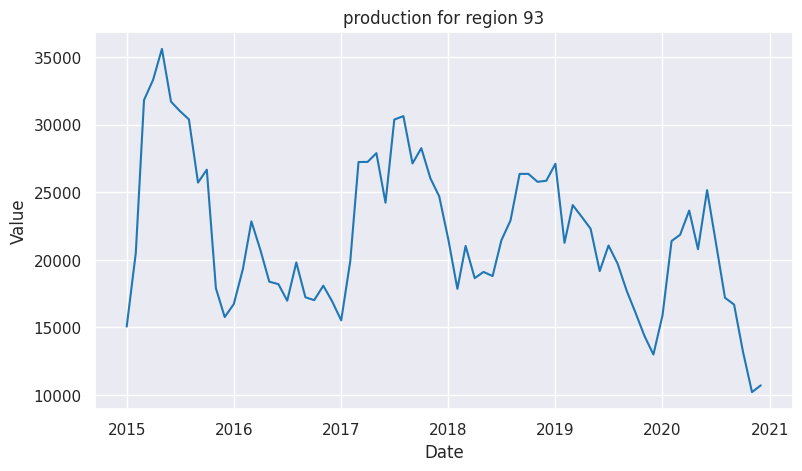

In [51]:
plot_df(production, x=production['start_date'][production['region_id']==94], y=production['prod'][production['region_id']==94], title='production for region 93')

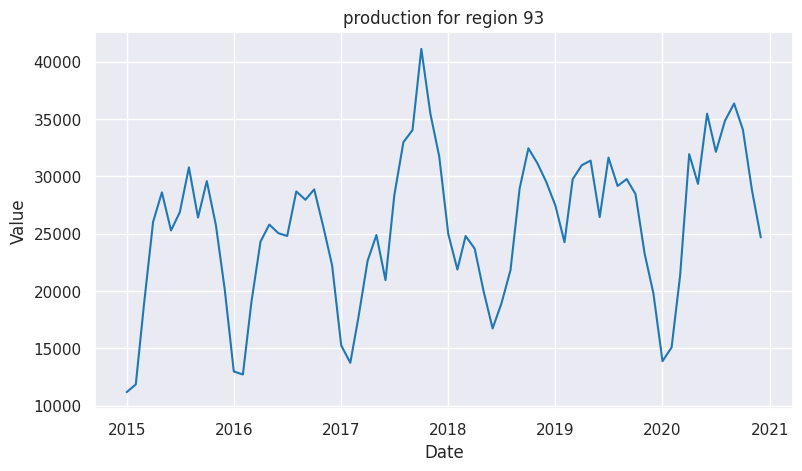

In [52]:
plot_df(production, x=production['start_date'][production['region_id']==95], y=production['prod'][production['region_id']==95], title='production for region 93')

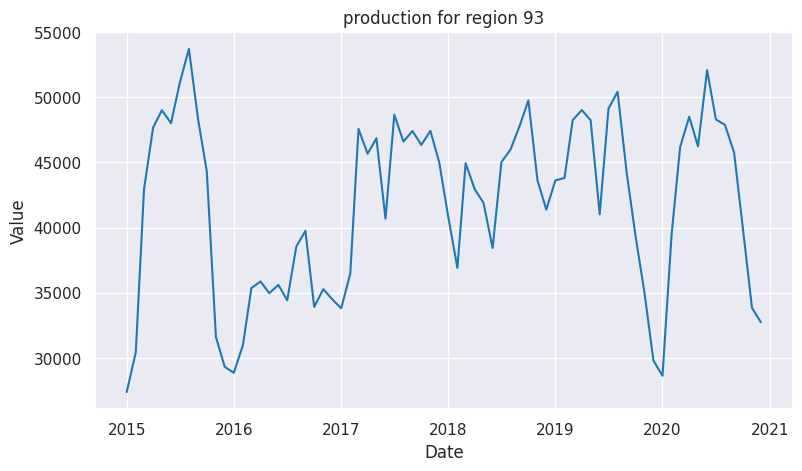

In [53]:
plot_df(production, x=production['start_date'][production['region_id']==104], y=production['prod'][production['region_id']==104], title='production for region 93')

In [54]:
production=production.set_index('start_date')

In [55]:
test=production[production['region_id']==93]


In [56]:
test.drop(columns='region_id')

,prod
start_date,
2015-01-01,171725
2015-02-01,188325
2015-03-01,247856
2015-04-01,282791
2015-05-01,291057
...,...
2020-08-01,301528
2020-09-01,302692
2020-10-01,273522


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


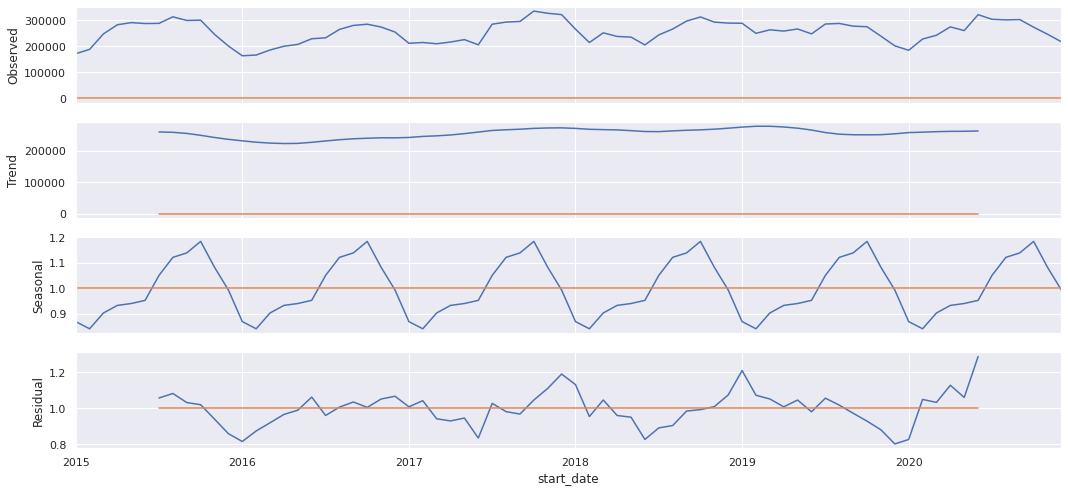

In [57]:
# Clearly there is seasonality in production data. 

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(test, model='multiplicative')
result.plot()
plt.show()

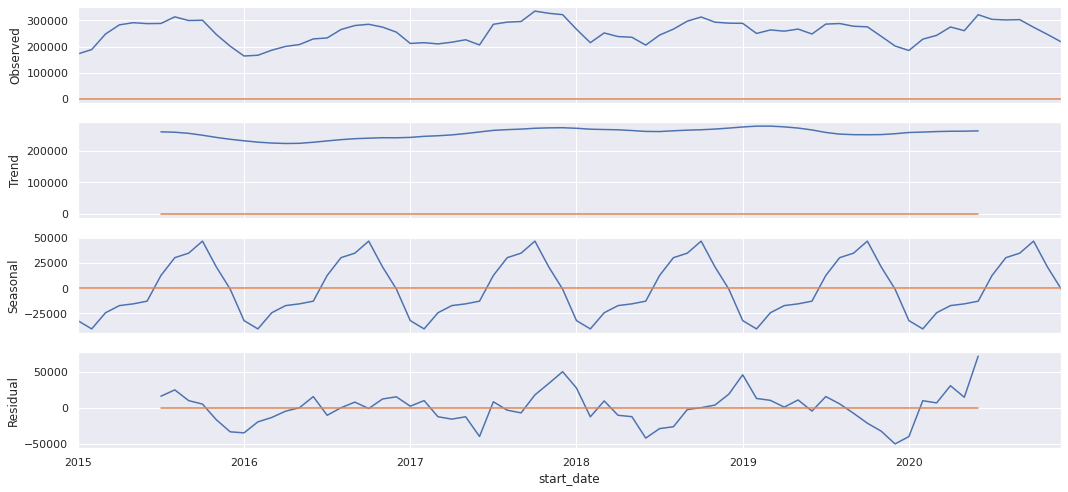

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(test, model='additive')
result.plot()
plt.show()

In [59]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


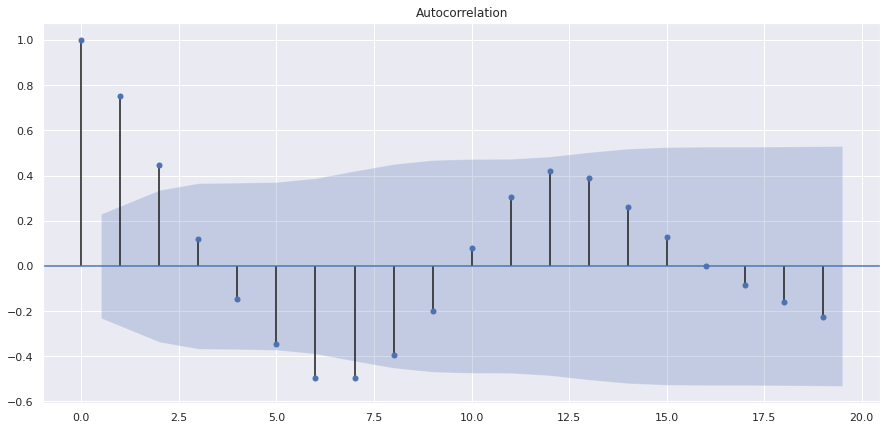

In [60]:
plot_acf(test['prod']);

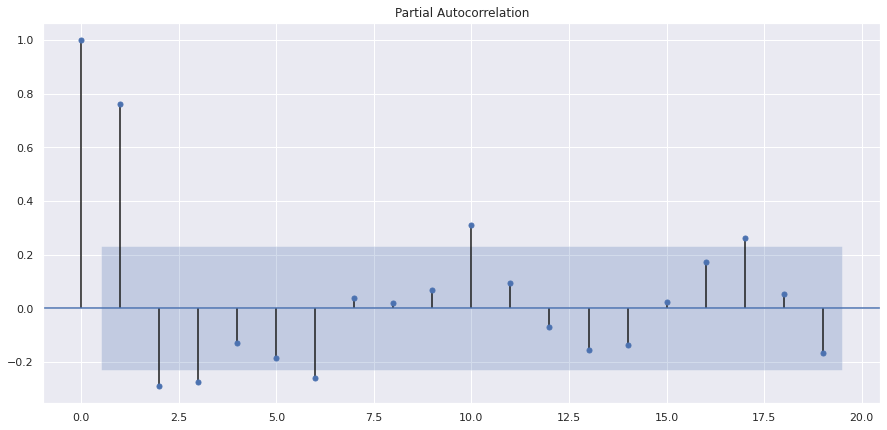

In [61]:
plot_pacf(test['prod']);


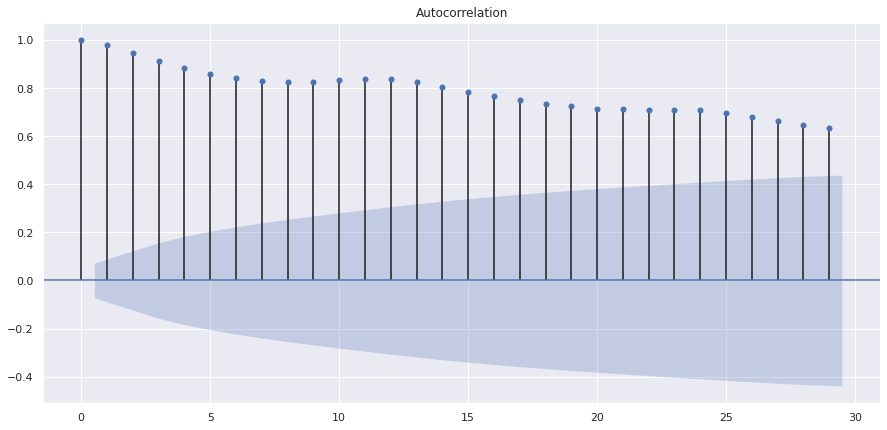

In [62]:
plot_acf(production['prod']);

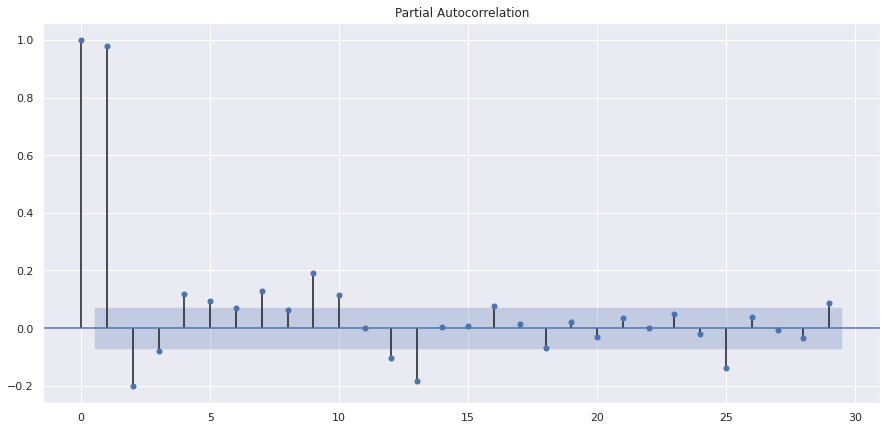

In [63]:
plot_pacf(production['prod']);

In [64]:

from statsmodels.tsa.stattools import adfuller

dftest = adfuller(production['prod'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.03728608086334
2. P-Value :  0.27046743704041454
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 707
5. Critical Values :
	 1% :  -3.439633170421852
	 5% :  -2.8656367026715337
	 10% :  -2.5689515744354794


In [65]:

from statsmodels.tsa.stattools import adfuller

dftest = adfuller(test['prod'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -4.60681233117602
2. P-Value :  0.0001254861746636556
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 68
5. Critical Values :
	 1% :  -3.530398990560757
	 5% :  -2.9050874099328317
	 10% :  -2.5900010121107266


Here p-value is less than 0.05 hence our time-series stationary